In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]

# Dataset generation

Using data available at 2020-5-30 15:37

In [8]:
import pandas as pd

df_text = pd.read_csv('buff_text.csv')
df_acquired = pd.read_csv('player_acquired_buff.csv')
df_equipped = pd.read_csv('player_equipped_buff.csv')
df_player = pd.read_csv('player.csv')
df_template = pd.read_csv('player_template.csv')

# Data exploration and feature engineering

### Players

In [9]:
players = df_player.copy()
print(players.columns)
players.describe()

Index(['steam_id', 'level', 'cash', 'exp', 'pills', 'last_seen_name',
       'last_ip', 'last_active', 'clan_id', 'clan_pos', 'reputation',
       'bar_mode', 'bar_style', 'language_id', 'spawn_type', 'surv_char',
       'booster_active', 'booster_multiplier', 'booster_expiration',
       'has_special_slot', 'coop_template', 'vs_survivor_template',
       'see_own_items', 'aoe_auto_heal_min_survs', 'aoe_auto_revive_min_survs',
       'role_smoker', 'role_boomer', 'role_hunter', 'role_spitter',
       'role_jockey', 'role_charger', 'honor_points', 'skill',
       'show_versus_title', 'notificationFlags', 'clan_no_join_end',
       'experimentalFlags', 'notify_damage_flags', 'active_class',
       'class_no_swap_end', 'pill_market_purchases',
       'black_market_buy_bitflag'],
      dtype='object')


,level,cash,exp,pills,clan_id,clan_pos,reputation,bar_mode,bar_style,language_id,...,role_charger,honor_points,skill,show_versus_title,notificationFlags,experimentalFlags,notify_damage_flags,active_class,pill_market_purchases,black_market_buy_bitflag
count,222521.000000,2.225210e+05,2.225210e+05,2.225210e+05,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,...,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000,222521.000000
mean,14.509013,7.700658e+04,7.096512e+04,1.009313e+03,1.083844,0.010210,40.556662,1.998885,1.035394,0.000009,...,4.997295,0.089093,99.904378,0.002598,284.097510,0.003573,3.685014,0.106857,0.000085,-9.983197
std,26.138928,7.582986e+06,1.951409e+06,2.998231e+05,16.619048,0.148254,150.417208,0.057968,1.035222,0.002998,...,0.084700,3.104867,2.717783,0.068774,189.048736,0.125668,183.453078,6.754197,0.018602,1.737103
min,1.000000,0.000000e+00,-6.600000e+03,0.000000e+00,0.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,3.000000,5.490000e+02,1.520000e+02,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
50%,6.000000,6.910000e+02,7.300000e+02,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
75%,13.000000,1.280000e+03,2.178000e+03,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
max,250.000000,2.057935e+09,2.029640e+08,9.999143e+07,493.000000,4.000000,1000.000000,3.000000,210.000000,1.000000,...,5.000000,743.000000,394.000000,3.000000,13822.000000,7.000000,15168.000000,605.000000,5.000000,246.000000


In [27]:
# Leave only columns that are really necessary
players = players[['steam_id', 'last_active', 'level', 'cash', 'pills', 'clan_id', 'clan_pos', 'reputation', 'coop_template', 'vs_survivor_template']]

# We need to also make sure we are using a representation of the active population.

players['last_active'] = pd.to_datetime(df_player['last_active']) 
players = players.loc[players['last_active'] > '2020-01-01']
players = players.loc[players['level'] > 100]



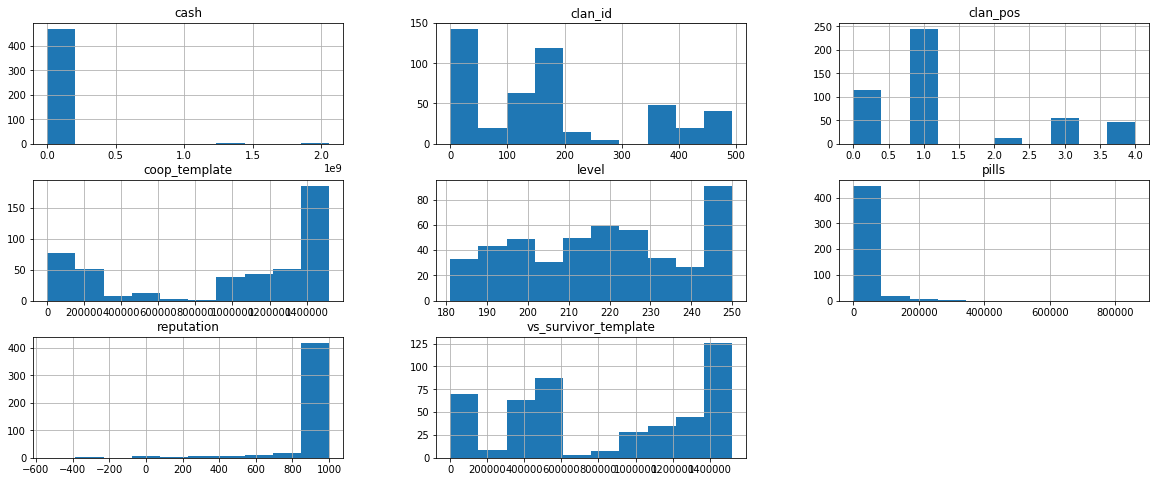

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
players.hist()
plt.show()

### Templates

In [29]:
mask = df_template['steam_id'].isin(list(players['steam_id']))
templates = df_template[mask]

### Acquired

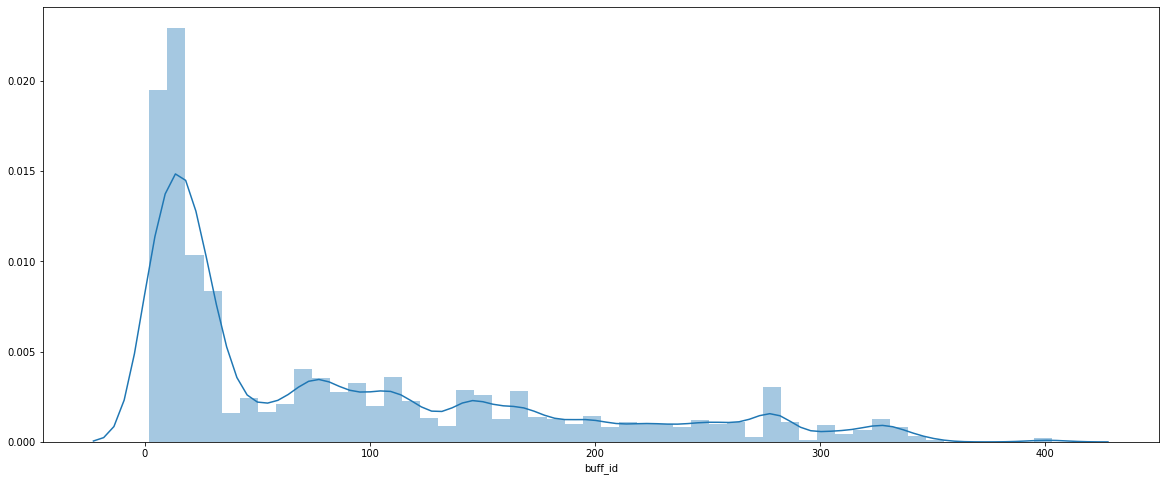

In [30]:
import seaborn as sns
sns.distplot(df_acquired['buff_id'])
plt.show()

### Equipped

In [31]:
mask = df_equipped['template_id'].isin(list(templates['template_id']))
equipped = df_equipped[mask]

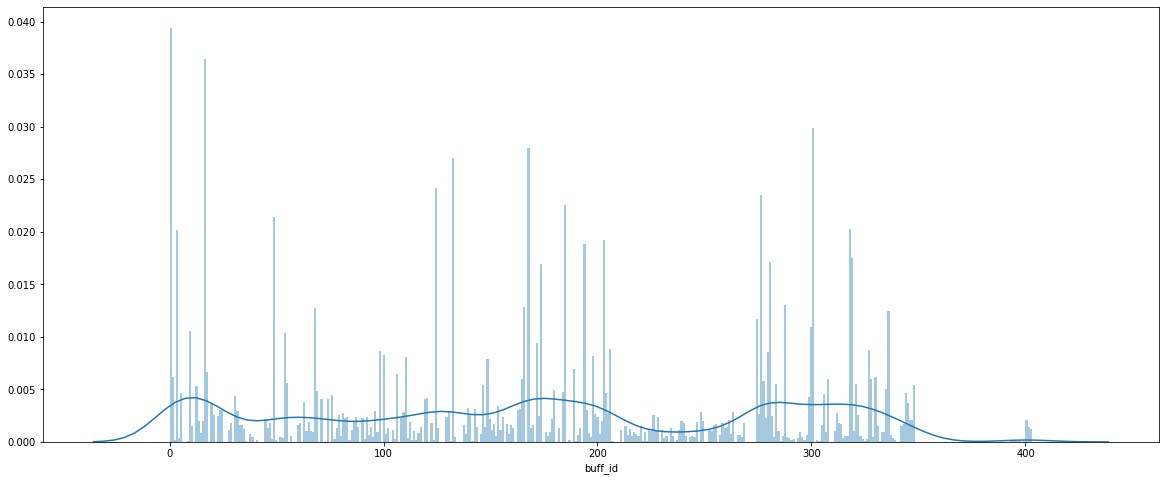

In [32]:
import seaborn as sns
sns.distplot(equipped['buff_id'], bins=400)
plt.show()

In [33]:
equipped_frequency = equipped['buff_id'].value_counts()

In [26]:
def get_buff_name(id):
    
    if (id == 0):
        return None
    return df_text.loc[(df_text['buff_id'] == id) & (df_text['language_id'] == 1)].name.values[0]


t = pd.DataFrame(equipped_frequency)
t.columns = ['Frequency']
t['Buff'] = list(map(lambda x: get_buff_name(x) , t.index.values))
print(t.to_string())

     Frequency                            Buff
0         2597                            None
17        2402                           Knife
301       1969                 Mobility Master
168       1840                     Tank Slayer
132       1778               |E| Knife Recycle
124       1590            |Q| Piercing Bullets
277       1551                     Unstoppable
185       1486                        Tenacity
49        1410                         Goggles
318       1333               |E| Dying Berserk
4         1330                  Adrenaline Run
203       1269                     |E| Berserk
194       1241                    Dummy Rounds
319       1155            |E| Slaying Automata
281       1127               |E| Helping Drone
174       1113            General Tank Handler
288        858              |V| Assassin Drone
166        845                         Avenger
68         842             Guardian Moustachio
336        821                  |C| Discharger
275        77